### IMPORT DATA

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [70]:
toyota=pd.read_csv("Toyota.csv")
toyota.head(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


###### 1. Checking Null Values

In [71]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


In [72]:
toyota['FuelType'].value_counts().index[0]

'Petrol'

In [73]:
toyota['FuelType'].fillna(toyota['FuelType']\
                         .value_counts().index[0],\
                         inplace=True)

In [74]:
toyota['MetColor'].mode()

0    1.0
Name: MetColor, dtype: float64

In [75]:
toyota['MetColor'].fillna(toyota['MetColor'].mode()[0],\
                   inplace=True)

In [76]:
toyota['Age'].mean()

55.67215568862275

In [77]:
toyota['Age'].fillna(toyota['Age'].mean(),\
                   inplace=True)

In [78]:
toyota['HP'].mode()

0    110
Name: HP, dtype: object

In [79]:
toyota['HP'].fillna(toyota['HP'].mode(),\
                   inplace=True)

In [80]:
toyota.describe()

,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,0.708914,0.055710,1566.827994,1072.45961
std,3626.964585,17.930380,0.454421,0.229441,187.182436,52.64112
min,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,44.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,59.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,68.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [81]:
toyota.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

toyota['Age'] = toyota.Age.astype(int)

toyota['MetColor'] = toyota.MetColor.astype(int)


In [82]:
print(toyota.dtypes)

Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object


### 3. Data Analysis - Numeric Column

In [83]:
rat = 0
c = 0

for i in toyota['Weight']:
    
    if(i != 0.0):
        rat += i
        c += 1
        
print(round(int(rat) / c, 2))

1072.46


In [84]:
toyota[toyota['Price'] == toyota['Price'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,55.672156,1,Petrol,116,0.0,0,2000,5,1480


In [85]:
toyota[toyota['Age'] == toyota['Age'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1051,6150,80.0,194765,Diesel,72,0.0,0,2000,3,1120
1062,6750,80.0,160000,Petrol,86,0.0,0,1300,3,1015
1077,6950,80.0,143560,Petrol,86,1.0,1,1300,3,1045
1081,9500,80.0,137178,Diesel,90,1.0,0,2000,5,1135
1090,9250,80.0,128351,Petrol,110,1.0,0,1600,5,1070
1104,7250,80.0,122820,Petrol,86,0.0,0,1300,5,1040
1122,7460,80.0,111392,CNG,110,0.0,0,1598,3,1083
1124,7250,80.0,110887,Petrol,110,1.0,0,1600,3,1055
1126,6800,80.0,110000,Petrol,110,1.0,0,1600,4,1035
1137,6500,80.0,105135,Petrol,110,1.0,0,1600,3,1050


In [86]:
toyota[toyota['FuelType'] == toyota['FuelType'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
7,18600,30.000000,75889,Petrol,90,1.0,0,2000,3,1245
8,21500,27.000000,19700,Petrol,192,0.0,0,1800,3,1185
10,20950,25.000000,31461,Petrol,192,0.0,0,1800,3,1185
11,19950,22.000000,43610,Petrol,192,0.0,0,1800,3,1185
12,19600,25.000000,32189,Petrol,192,0.0,0,1800,3,1185
...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.000000,??,Petrol,86,0.0,0,1300,3,1015
1433,8500,55.672156,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.000000,??,Petrol,86,1.0,0,1300,3,1015


In [87]:
toyota[toyota['HP'] == toyota['HP'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,16900,27.0,??,Diesel,????,1.0,0,2000,3,1245
9,12950,23.0,71138,Diesel,????,1.0,0,1900,3,1105
15,22000,28.0,18739,Petrol,????,0.0,0,1800,3,1185
631,8950,67.0,127000,Diesel,????,1.0,0,2000,5,1135
638,10450,64.0,120400,Petrol,????,0.0,0,1600,5,1090
1245,7990,77.0,80486,Petrol,????,1.0,0,1600,5,1070


In [88]:
toyota[toyota['CC'] == toyota['CC'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,1.0,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1195,8750,74.0,89800,Diesel,72,1.0,0,2000,3,1115
1202,6950,73.0,88186,Diesel,72,1.0,0,2000,3,1115
1216,8500,70.0,85864,Diesel,72,1.0,0,2000,5,1135
1320,9400,69.0,67092,Diesel,72,1.0,0,2000,3,1115


In [89]:
toyota[toyota['MetColor'] == toyota['MetColor'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.000000,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.000000,41711,Diesel,90,1.0,0,2000,3,1165
6,16900,27.000000,??,Diesel,????,1.0,0,2000,3,1245
7,18600,30.000000,75889,Petrol,90,1.0,0,2000,3,1245
...,...,...,...,...,...,...,...,...,...,...
1427,8950,55.672156,29000,Petrol,86,1.0,1,1300,3,1045
1428,8450,72.000000,??,Petrol,86,1.0,0,1300,3,1015
1429,8950,78.000000,24000,Petrol,86,1.0,1,1300,5,1065
1431,7500,55.672156,20544,Petrol,86,1.0,0,1300,3,1025


In [90]:
toyota[toyota['Automatic'] == toyota['Automatic'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
21,16950,29.000000,43905,Petrol,110,0.0,1,1600,3,1170
52,20500,26.000000,56000,Petrol,110,1.0,1,1600,5,1180
54,15500,25.000000,49163,Petrol,110,0.0,1,1600,5,1165
58,18950,23.000000,39704,Petrol,110,1.0,1,1600,5,1180
80,18950,25.000000,20019,Petrol,110,1.0,1,1600,5,1180
...,...,...,...,...,...,...,...,...,...,...
1421,8500,78.000000,??,Petrol,86,0.0,1,1300,3,1045
1423,7950,80.000000,35821,Petrol,86,0.0,1,1300,3,1015
1426,9950,78.000000,30964,Petrol,110,1.0,1,1600,3,1080
1427,8950,55.672156,29000,Petrol,86,1.0,1,1300,3,1045


In [91]:
toyota[toyota['Doors'] == toyota['Doors'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165


In [92]:
toyota[toyota['Weight'] == toyota['Weight'].max()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
221,12450,44.0,74172,Petrol,110,1.0,0,1600,5,1615


### 4. visualization

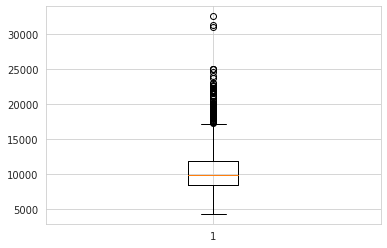

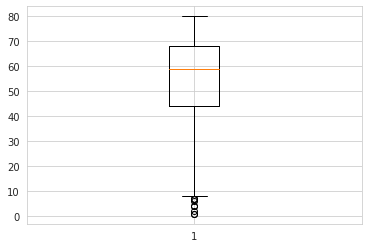

In [93]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([toyota['Price']])
plt.figure(2)
plt.boxplot([toyota['Age']])
plt.show()

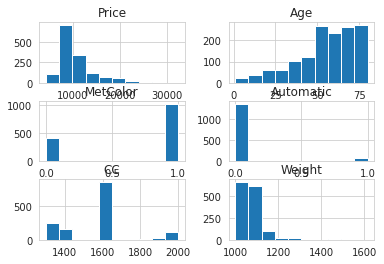

In [94]:
plt.figsize=(32,6)
toyota.hist()
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

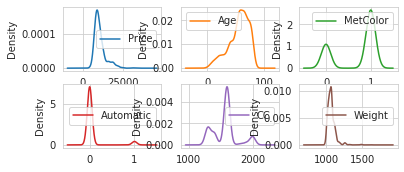

In [95]:
toyota.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

Price           AxesSubplot(0.125,0.536818;0.133621x0.343182)
Age          AxesSubplot(0.285345,0.536818;0.133621x0.343182)
MetColor      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Automatic    AxesSubplot(0.606034,0.536818;0.133621x0.343182)
CC           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Weight             AxesSubplot(0.125,0.125;0.133621x0.343182)
dtype: object

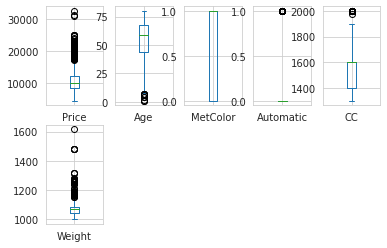

In [96]:
toyota.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

<AxesSubplot:xlabel='Automatic', ylabel='MetColor'>

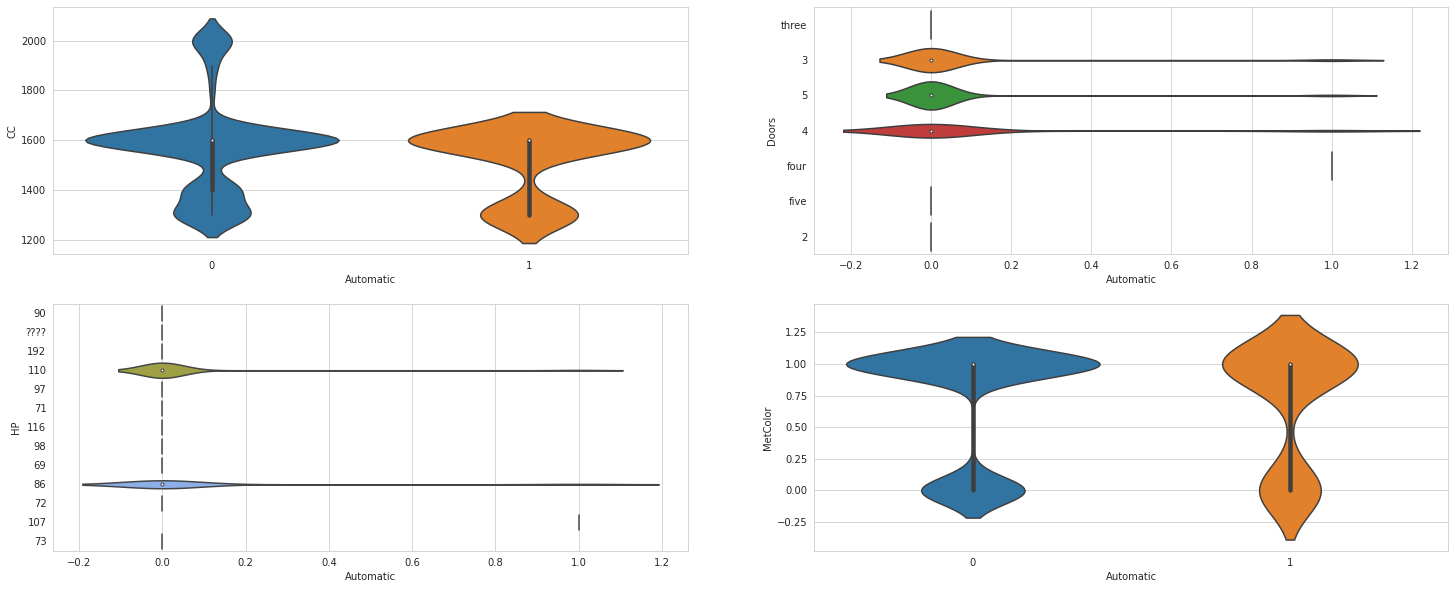

In [97]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.violinplot(x='Automatic',y='CC',data=toyota)
plt.subplot(2,2,2)
sns.violinplot(x='Automatic',y='Doors',data=toyota)
plt.subplot(2,2,3)
sns.violinplot(x='Automatic',y='HP',data=toyota)
plt.subplot(2,2,4)
sns.violinplot(x='Automatic',y='MetColor',data=toyota)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

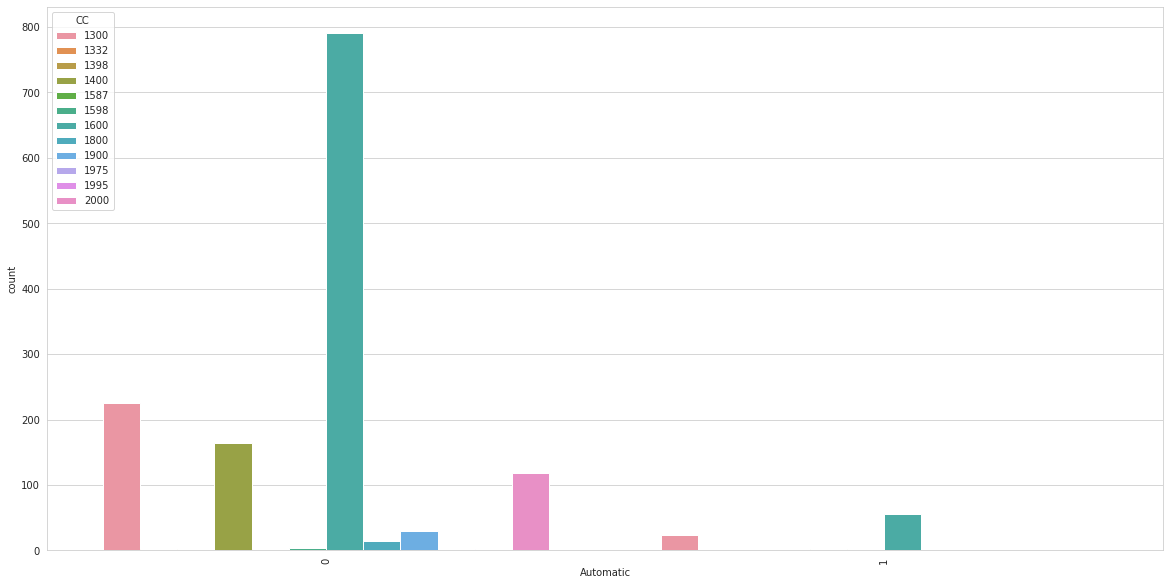

In [98]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x = 'Automatic',hue='CC',data=toyota)
plt.xticks(rotation = 90)

Average age of Price per
 Price
4350     44.0
4400     74.0
4450     56.0
4750     44.0
5150     56.0
         ... 
24950     8.0
24990     8.0
31000     4.0
31275     4.0
32500    56.0
Name: Age, Length: 236, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '90'),
  Text(1, 0, '????'),
  Text(2, 0, '192'),
  Text(3, 0, '110'),
  Text(4, 0, '97'),
  Text(5, 0, '71'),
  Text(6, 0, '116'),
  Text(7, 0, '98'),
  Text(8, 0, '69'),
  Text(9, 0, '86'),
  Text(10, 0, '72'),
  Text(11, 0, '107'),
  Text(12, 0, '73')])

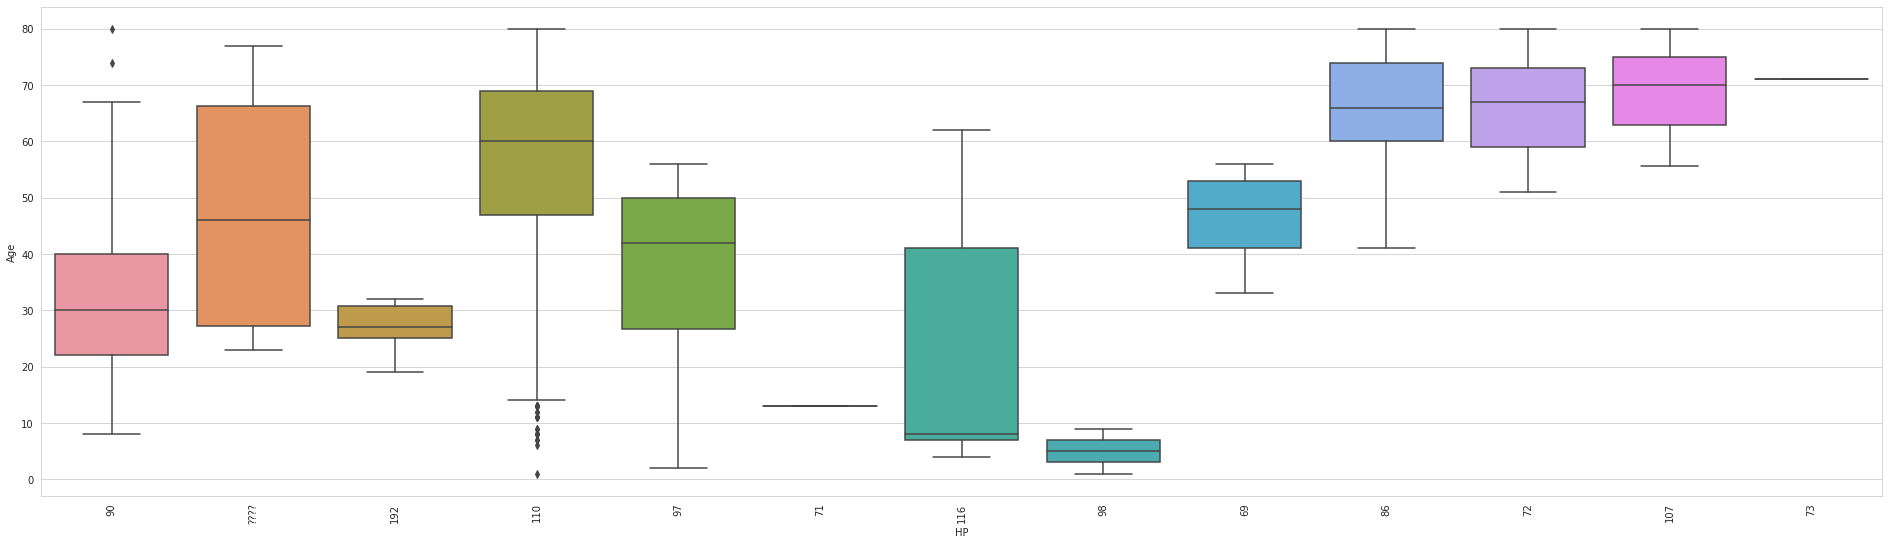

In [99]:
plt.figure(figsize=(33, 9))
sns.boxplot(x='HP',y='Age',data=toyota)
print('Average age of Price per\n', toyota.groupby(["Price"])["Age"].mean().round(0))
plt.xticks(rotation = 90)

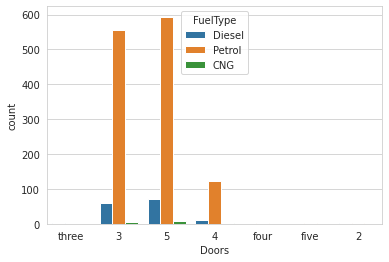

In [100]:
sns.countplot(x = "Doors", hue="FuelType", data=toyota)
plt.show()

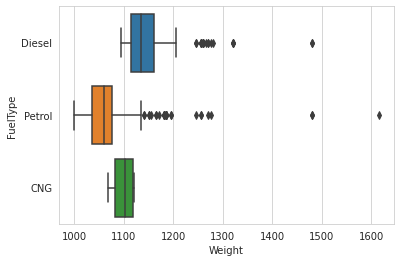

In [101]:
sns.boxplot(y="FuelType", x = "Weight", data = toyota[toyota["Weight"]>0])
plt.show()

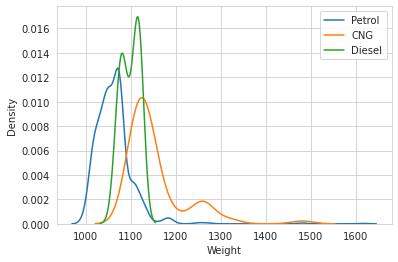

In [102]:
plt.figure()
sns.kdeplot(x = "Weight", data = toyota[toyota["FuelType"] == "Petrol"])
sns.kdeplot(x = "Weight", data = toyota[toyota["FuelType"] == "Diesel"])
sns.kdeplot(x = "Weight", data = toyota[toyota["FuelType"] == "CNG"]) 
sns.kdeplot(x = "Weight", data = toyota[toyota["FuelType"] == "0"])
plt.legend(["Petrol", "CNG","Diesel","0"])
plt.show()

In [103]:
toyota["Age"]

0       23.000000
1       23.000000
2       24.000000
3       26.000000
4       30.000000
          ...    
1431    55.672156
1432    72.000000
1433    55.672156
1434    70.000000
1435    76.000000
Name: Age, Length: 1436, dtype: float64

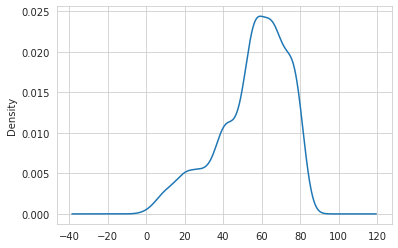

In [104]:
toyota["Age"].plot.kde()
plt.show()

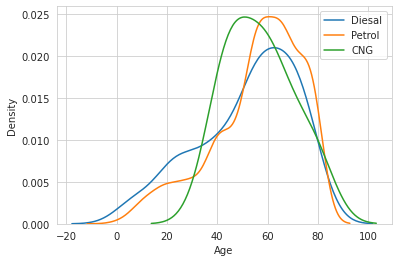

In [105]:
plt.figure()
sns.kdeplot(x = "Age", data = toyota[toyota["FuelType"] == "Diesel"])
sns.kdeplot(x = "Age", data = toyota[toyota["FuelType"] == "Petrol"])
sns.kdeplot(x = "Age", data = toyota[toyota["FuelType"] == "CNG"])
sns.kdeplot(x = "Age", data = toyota[toyota["FuelType"] == "0"])
plt.legend(["Diesal","Petrol","CNG","0"])
plt.show()

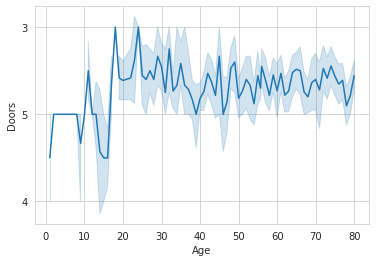

In [106]:
sns.lineplot(x="Age", y="Doors", data=toyota)
plt.show()

<AxesSubplot:xlabel='Doors', ylabel='count'>

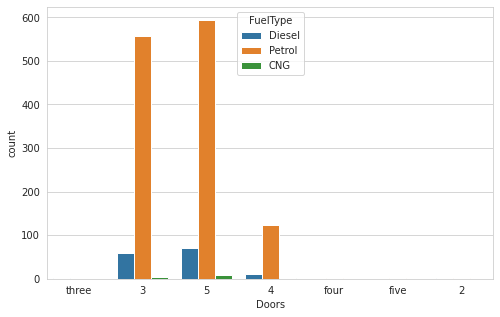

In [107]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Doors',hue='FuelType',data=toyota)

<function matplotlib.pyplot.show(close=None, block=None)>

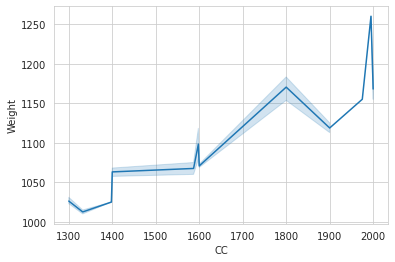

In [108]:
sns.lineplot(x="CC", y="Weight", data=toyota)
plt.show

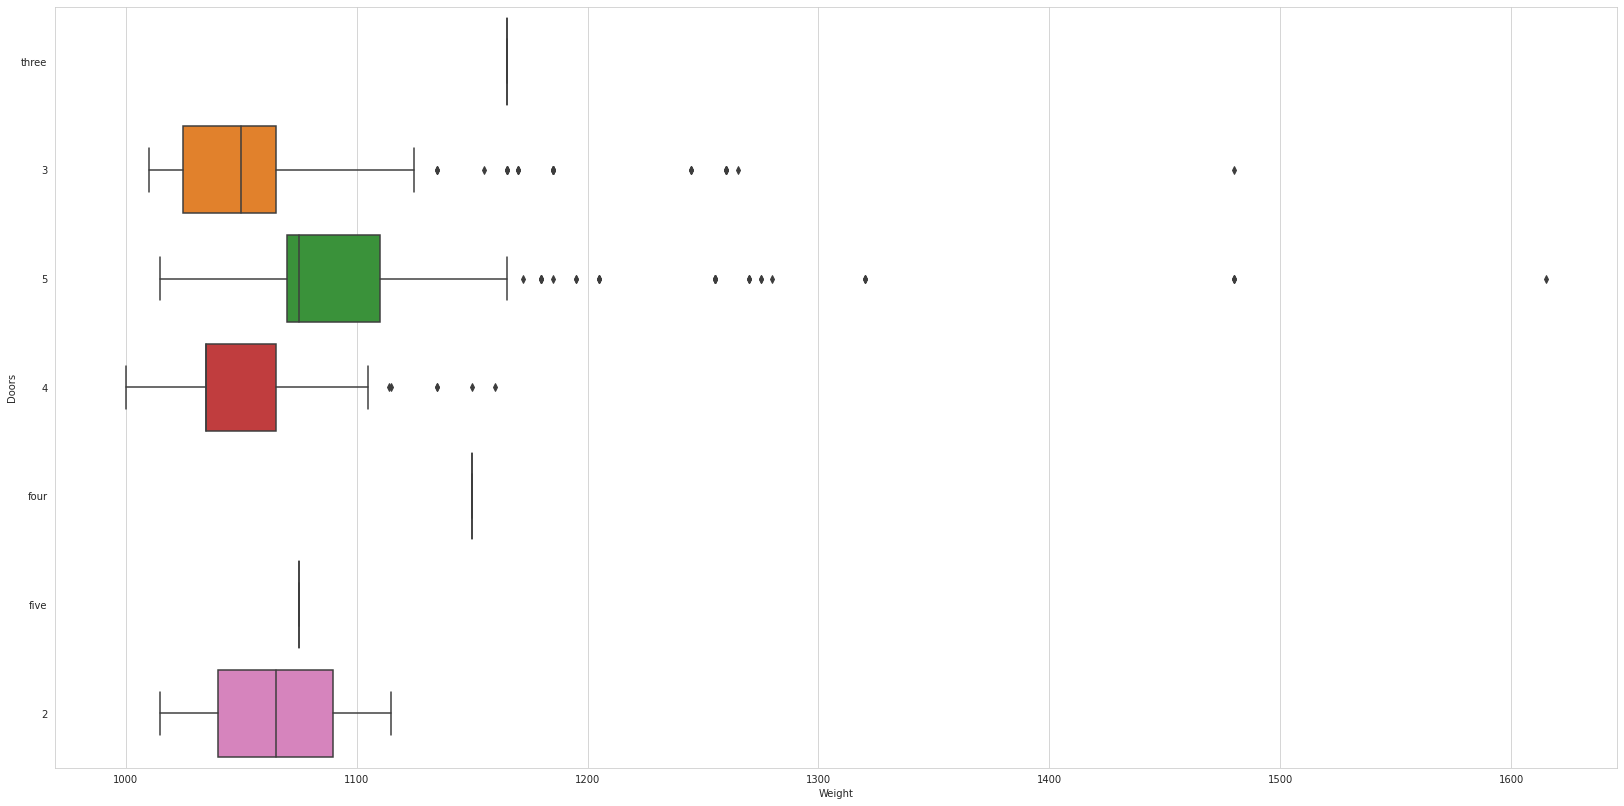

In [109]:
plt.figure(figsize=(28,14))
sns.boxplot(y="Doors", x = "Weight", data = toyota[toyota["Weight"]> 0])
plt.show()

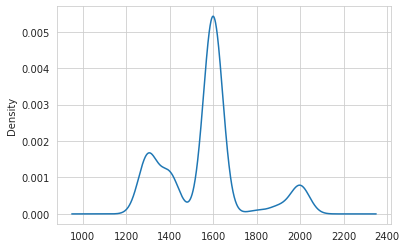

In [110]:
toyota["CC"].plot.kde()
plt.show()

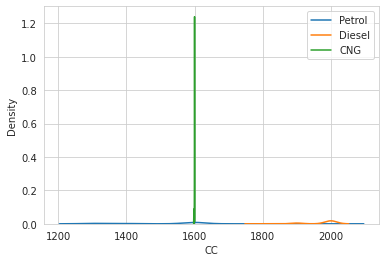

In [111]:
plt.figure()
sns.kdeplot(x = "CC", data = toyota[toyota["FuelType"] == "Petrol"])
sns.kdeplot(x = "CC", data = toyota[toyota["FuelType"] == "Diesel"])
sns.kdeplot(x = "CC", data = toyota[toyota["FuelType"] == "CNG"])
sns.kdeplot(x = "CC", data = toyota[toyota["FuelType"] == "0"])
plt.legend(["Petrol", "Diesel","CNG","0"])
plt.show()

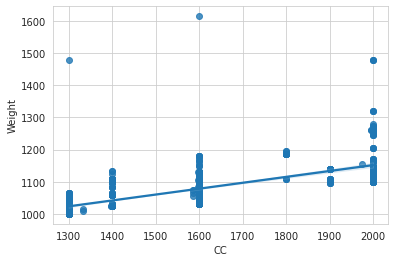

In [112]:
sns.regplot(x="CC", y="Weight", data=toyota[toyota.Weight>0])
plt.show()

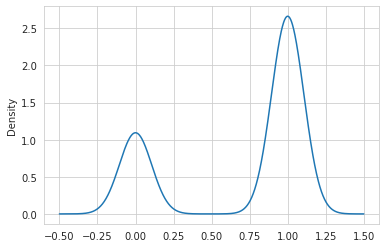

In [113]:
toyota["MetColor"].plot.kde()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

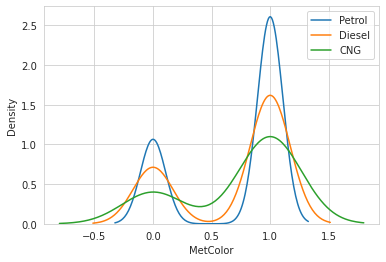

In [114]:
plt.figure()
sns.kdeplot(x = "MetColor", data = toyota[toyota["FuelType"] == "Petrol"])
sns.kdeplot(x = "MetColor", data = toyota[toyota["FuelType"] == "Diesel"])
sns.kdeplot(x = "MetColor", data = toyota[toyota["FuelType"] == "CNG"])
sns.kdeplot(x = "MetColor", data = toyota[toyota["FuelType"] == "0"])
plt.legend(["Petrol", "Diesel","CNG","0"])
plt.show

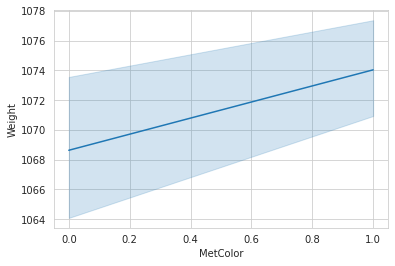

In [115]:
sns.lineplot(x="MetColor", y="Weight", data=toyota[toyota.Weight>0])
plt.show()

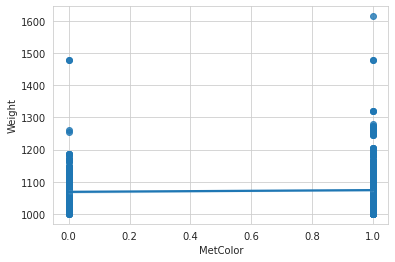

In [116]:
sns.regplot(x="MetColor", y="Weight", data=toyota[toyota.Weight>0])
plt.show()

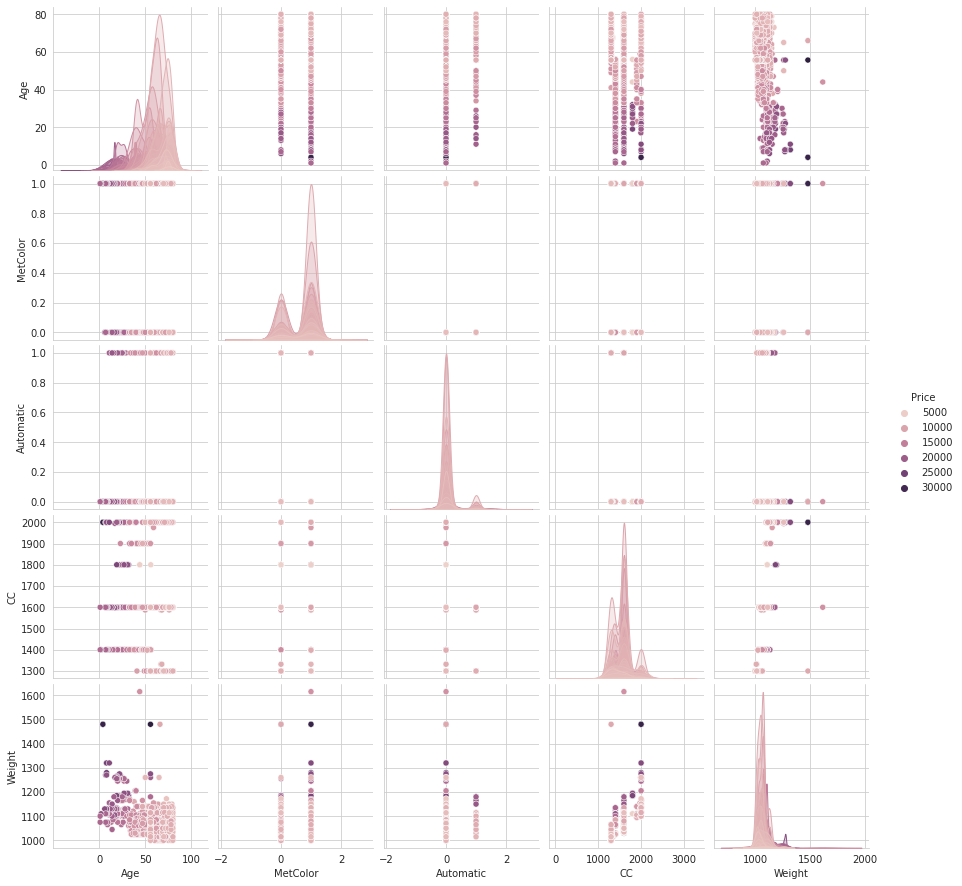

In [117]:
sns.pairplot(toyota,hue='Price');

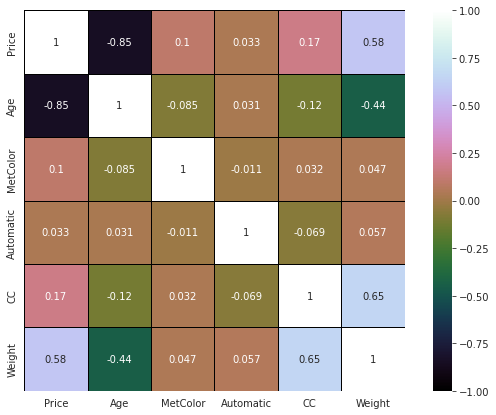

In [118]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(toyota.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)